<h1><center>Ising Model - Magnetic Phase Transition</center></h1>


### Importing the necessary modules

In [ ]:
import numpy as np
from IPython.display import clear_output, display
from ipywidgets import FloatProgress
from numpy.random import rand
import matplotlib.pyplot as plt
%matplotlib inline

### Functions required for the program

In [ ]:
def initialise(N):
    '''
    Generates a NxN matrix with random up and down spins for an initial state
    '''
    smat = 2*np.random.randint(2,size = (N,N))-1
    return smat

def magnetisation(state):
    '''
    Return the magnetisation of the system
    '''
    mag = np.sum(state)
    return mag

def energy(state):
    '''
    Returns the energy of the system
    '''
    e = 0; N = len(state)
    for i in range(N):
        for j in range(N):
            spin = state[i][j]
            nn = (state[(i+1)%N][j] + state[i][(j+1)%N] + state[(i-1)%N][j] + state[i][(j-1)%N])
            e -= spin*nn  
    return e/2
    
def update(state,T):
    '''
    Updates the state of the system by metropolis algorithm
    '''
    N = len(state)
    for _ in range(N):
        for _ in range(N):
            x = np.random.randint(N); y = np.random.randint(N)
            s = state[x,y];
            de = 2*(s*(state[(x+1)%N][y] + state[x][(y+1)%N] + state[(x-1)%N][y] + state[x][(y-1)%N]))
            if de < 0 or np.exp(-de/T) > rand():
                s *= -1 
            state[x,y] = s
    return state 

### Initialising the parameters for the program

In [ ]:
nt = 30 # no of Temperature points
Temp = np.linspace(1.5,3.5,nt) # Temperature of the system
ni = 1000 # no of iterations 
sampling = 1000 # No of sampling points
N = 15 # dimension of lattice - NxN 
M,E = (np.zeros(nt) for _ in range(2))

### The time loop of the Ising Model. Here, the time loop refers to the update steps

In [ ]:
cnt = 0; progress = 0
f = FloatProgress(min = 0, max = 100, description = 'Progress:') #Progress bar
display(f)
for i in range(nt):
    e,mag,m1,m2 = 0,0,0,0
    state = initialise(N)
    
    for k in range(ni):
        state = update(state,Temp[i])
        
    for _ in range(sampling):
        state = update(state,Temp[i])
        e += energy(state); mag += magnetisation(state);
        
    E[i] = e/(sampling*N*N); M[i] = mag/(sampling*N*N);
    cnt += 1; progress = (cnt*100)/nt
    f.value = progress

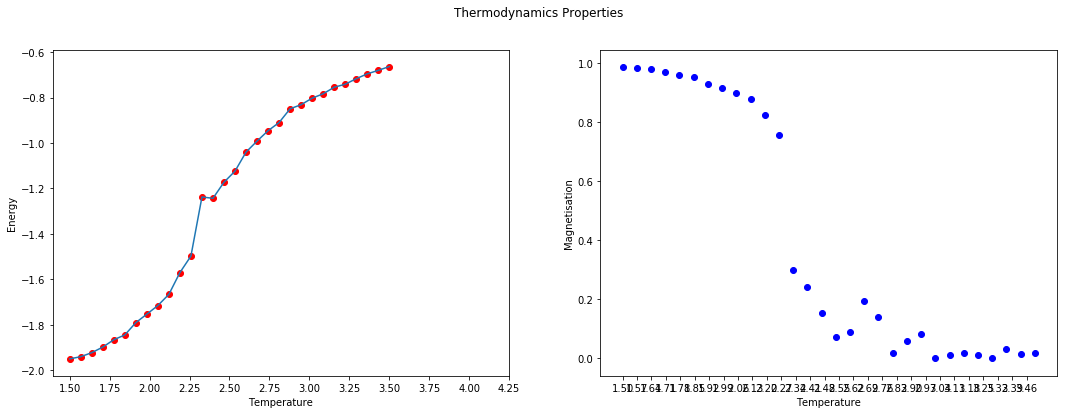

In [17]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Thermodynamics Properties')
plt.subplot(1,2,1)
plt.scatter(Temp,E, color = 'red')
plt.plot(Temp,E)
plt.xlabel('Temperature')
plt.xticks(np.arange(min(Temp),max(Temp)+1,0.25))
plt.ylabel('Energy')
plt.subplot(1,2,2)
plt.scatter(Temp,abs(M), color = 'blue')
plt.xlabel('Temperature')
plt.ylabel('Magnetisation')
plt.xticks(np.arange(min(Temp),max(Temp),0.07))
plt.savefig('TA_Scatter.png', bbox_inches='tight')
plt.show()